In [1]:
import torch
import umap
import numpy as np
import matplotlib.pyplot as plt

/Users/ng27753/Astronomy_Research/spender/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [29]:
# use latex
plt.rcParams.update({"text.usetex": True,

})

In [2]:
device = torch.device('cpu')

In [3]:
latent_space_dict = torch.load('../desi_noise_spender_10latent_space.pt', map_location=device)

In [4]:
latents = latent_space_dict['latents']

A = latent_space_dict['A']
A = A.squeeze()

z = latent_space_dict['zs']

In [40]:
reducer = umap.UMAP(random_state=42, n_neighbors=5).fit(latents)

/Users/ng27753/Astronomy_Research/spender/.venv/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [41]:
embeddings = reducer.transform(latents)

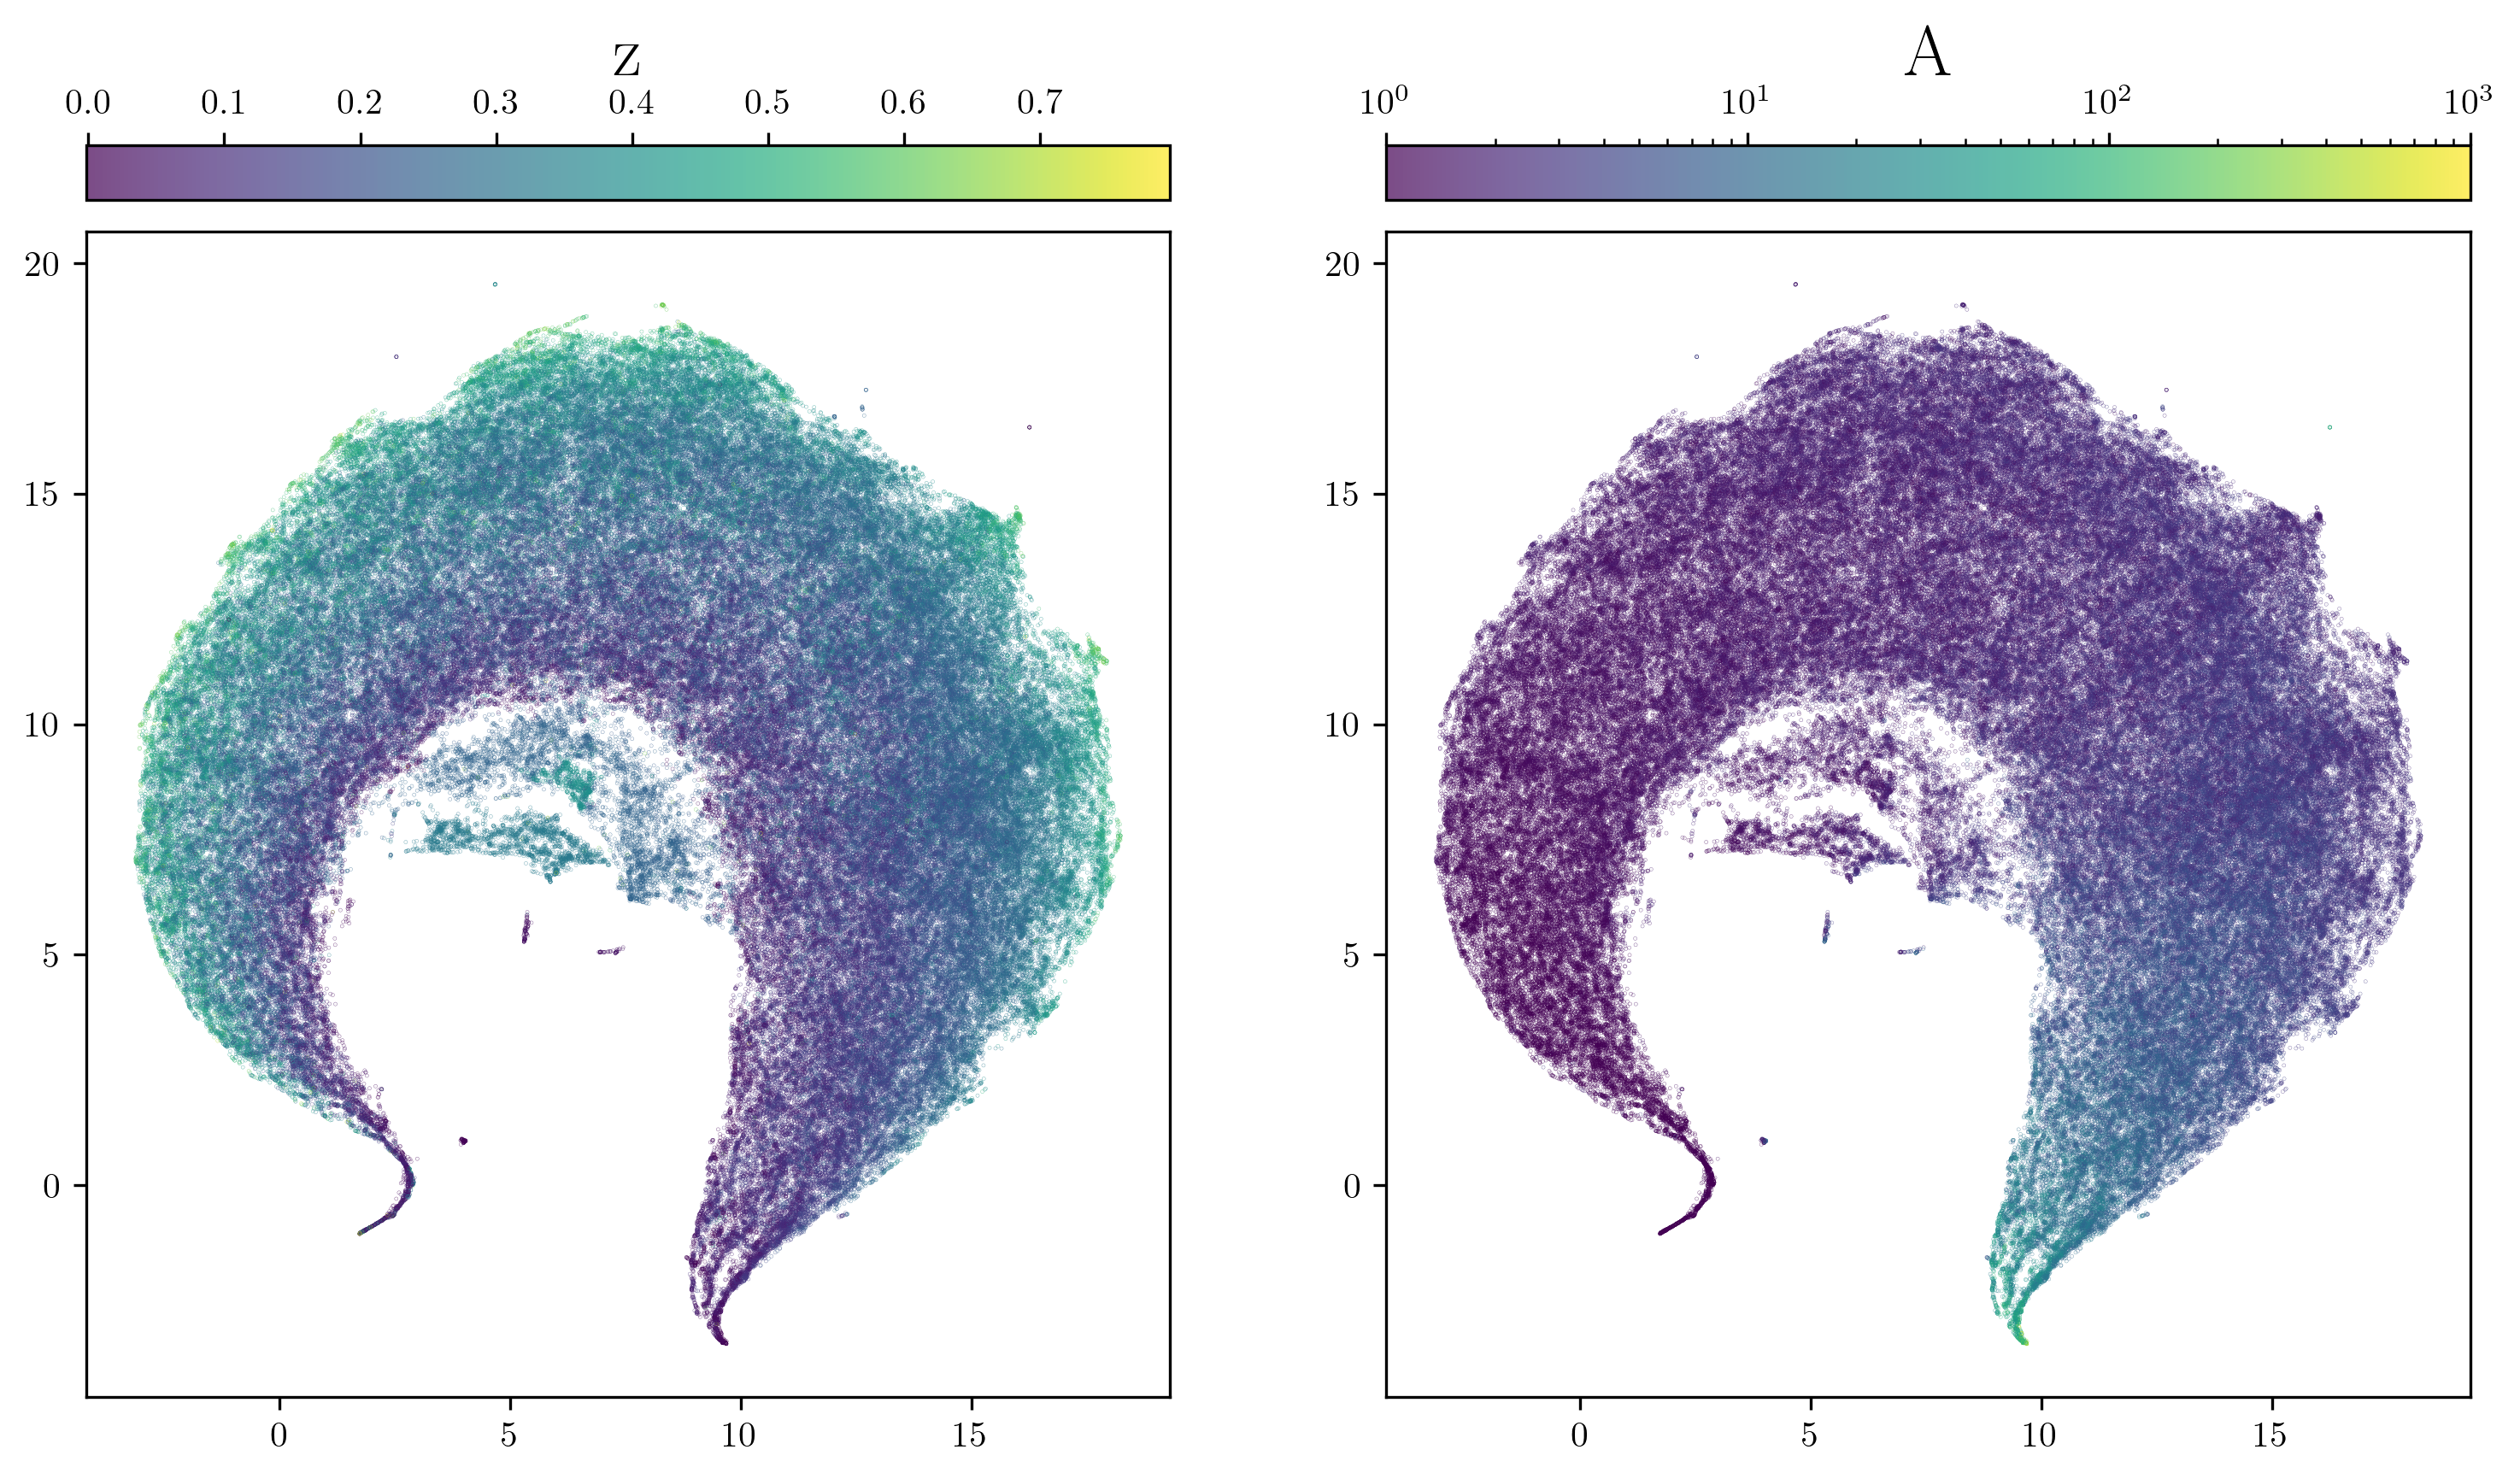

In [42]:
fig, ax = plt.subplots(1, 2, figsize=(12, 8), dpi=300)
ax = ax.ravel()

# both ax should be equal aspect
for a in ax:
    a.set_aspect('equal', 'box')

scatter = ax[0].scatter(
    embeddings[:, 0], embeddings[:, 1],
    c=z, cmap='viridis',
    s=0.01, alpha=0.7
)

# colorbar on top
cbar = fig.colorbar(
    scatter,
    ax=ax[0],
    orientation='horizontal',
    pad=0.02,          # distance between plot and colorbar
    location='top'
)


cbar.set_label('z', fontsize=20)

import matplotlib as mpl
norm = mpl.colors.LogNorm(vmin=1, vmax=1000)
cmap = mpl.cm.ScalarMappable(norm=norm, cmap='viridis')
scatter.set_cmap(cmap.cmap)

scatter = ax[1].scatter(embeddings[:, 0], embeddings[:, 1], c=A, s=.01, alpha=0.7, norm=norm,)

cbar = plt.colorbar(scatter, ax=ax[1], orientation='horizontal', pad=0.02, location='top')
cbar.set_label('A', fontsize=20)


<Axes: >

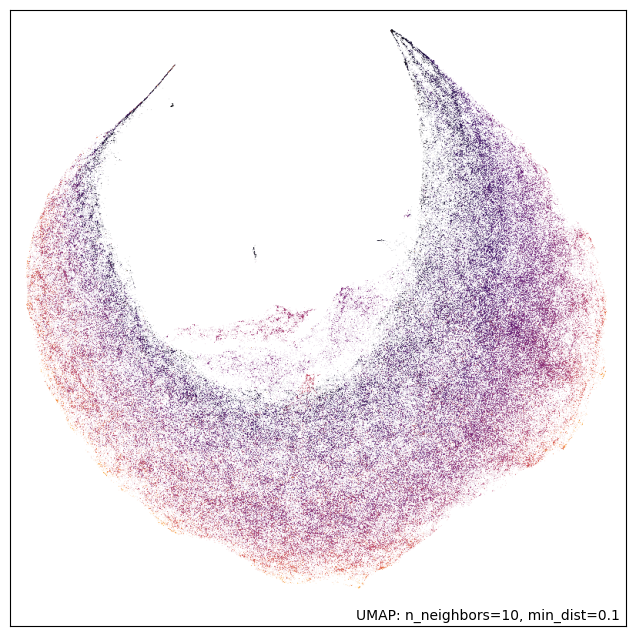

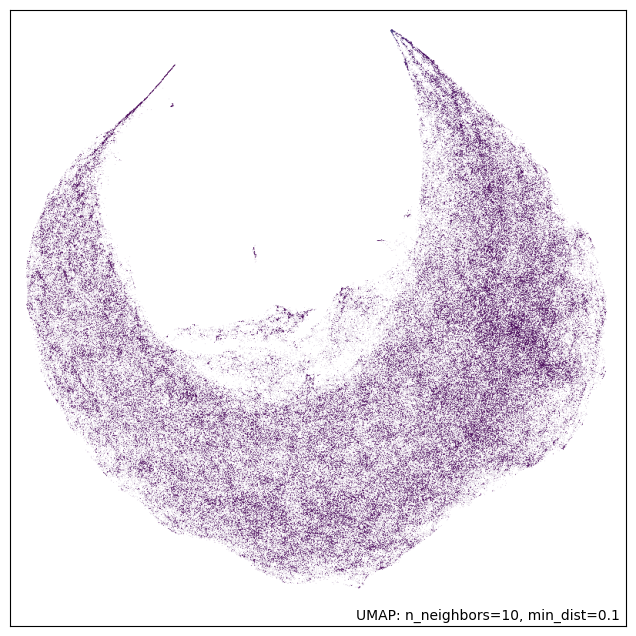

In [14]:
import umap.plot

umap.plot.points(reducer,  values=z.numpy(), cmap='inferno')
umap.plot.points(reducer,  values=A.numpy(), cmap='viridis')

/Users/ng27753/Astronomy_Research/spender/.venv/lib/python3.9/site-packages/umap/plot.py:895: UserWarning: Hammer edge bundling is expensive for large graphs!
This may take a long time to compute!
  warn(


<Axes: >

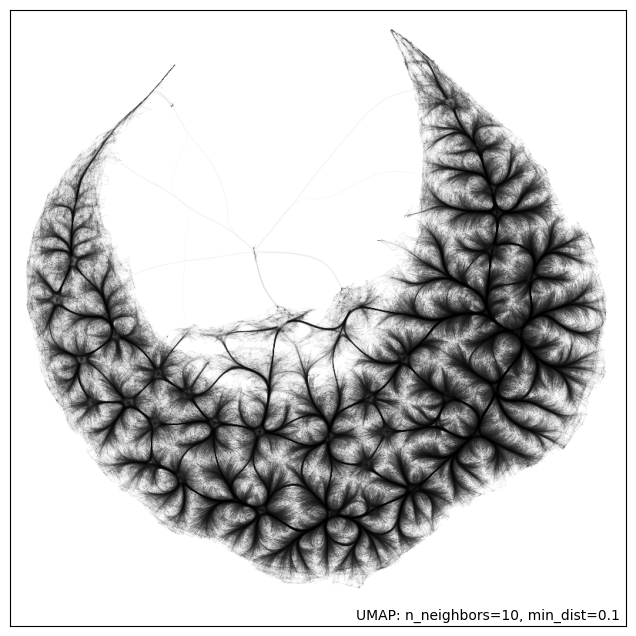

In [10]:
umap.plot.connectivity(reducer, edge_bundling='hammer')